AT Projeto de Bloco - Análise, Qualidade e Governança de Dados

Professor: Fernando Guimarães

Aluno: Giovano Montemezzo Panatta

Dataset: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

Problema: 

A empresa automobilística chinesa Geely Auto deseja entrar no mercado dos EUA, produzindo carros localmente para competir com empresas dos EUA e Europa. Contrataram uma consultoria automobilística para entender os fatores que afetam o preço dos carros nos EUA e querem saber:

Quais variáveis afetam significativamente o preço dos carros.
Quão bem essas variáveis explicam o preço dos carros.
A consultoria coletou um grande conjunto de dados sobre diferentes tipos de carros no mercado americano.

Objetivo:
Precisamos modelar o preço dos carros com as variáveis disponíveis. Isso ajudará a administração a entender como os preços variam com essas variáveis e ajustar o design dos carros e a estratégia de negócios para atingir certos níveis de preço. Além disso, o modelo ajudará a compreender a dinâmica de preços em um novo mercado.

Observação:

O Canvas - Data Science Workflow - consta em um arquivo à parte, na mesma pasta deste trabalho.

In [1]:
#Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np



In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Abaixo, podemos notar que o nosso DataFrame possui 205 linhas e 26 colunas 

In [3]:
data.shape

(205, 26)

Dicionário de Dados:

Variável	Descrição
1	ID único de cada observação (Inteiro)
2	Classificação de risco de seguro atribuída (Categórico)
3	Nome da empresa de carros (Categórico)
4	Tipo de combustível do carro, i.e., gasolina ou diesel (Categórico)
5	Tipo de aspiração usada no carro (Categórico)
6	Número de portas no carro (Categórico)
7	Tipo de carroceria do carro (Categórico)
8	Tipo de tração do carro (Categórico)
9	Localização do motor do carro (Categórico)
10	Distância entre eixos do carro (Numérico)
11	Comprimento do carro (Numérico)
12	Largura do carro (Numérico)
13	Altura do carro (Numérico)
14	Peso do carro sem ocupantes ou bagagem (Numérico)
15	Tipo de motor (Categórico)
16	Cilindros no motor do carro (Categórico)
17	Tamanho do motor do carro (Numérico)
18	Sistema de combustível do carro (Categórico)
19	Razão de furo do carro (Numérico)
20	Curso ou volume dentro do motor (Numérico)
21	Razão de compressão do carro (Numérico)
22	Cavalos de força (Numérico)
23	RPM de pico do carro (Numérico)
24	Quilometragem na cidade (Numérico)
25	Quilometragem na estrada (Numérico)
26	Preço do carro (Numérico)

In [4]:
#Verificando se há dados faltantes
missing_data = data.isnull().sum()
missing_data


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Observação: Conforme podemos observar, nosso dataset não apresenta dados faltantes. Este tipo de característica é comum em datasets derivados do Kaggle, porém, em casos reais, sabemos que datasets completos são exceções. Mais adiante utilizaremos técnicas de qualidade de dados mais refinadas na tentativa de encontrarmos inconsistências.

Estatísticas Descritivas Gerais:

In [5]:
descriptive_stats = data.describe()
descriptive_stats

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Plotagem das variáveis categóricas:

Observação: Nosso primeiro gráfico com variáveis categóricas 'Top 10 Marcas Mais Comuns' será comparado posteriormente com outra plotagem após o tratamento dos dados.

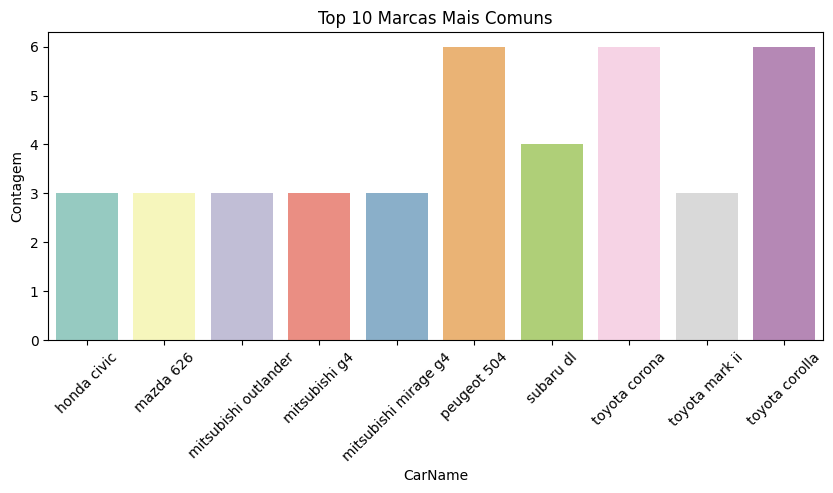

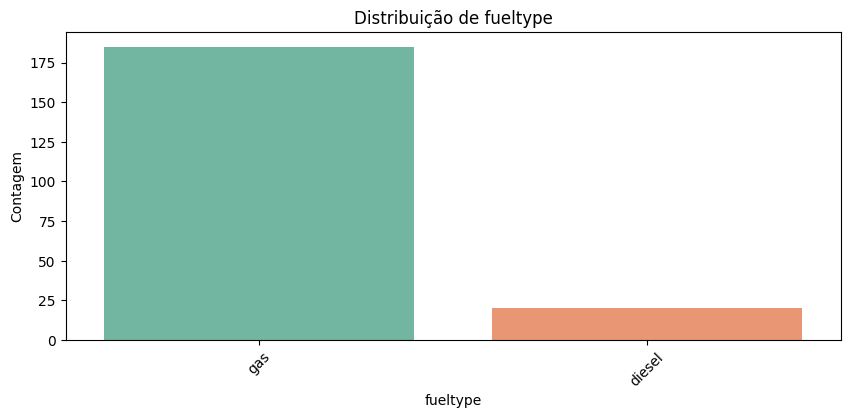

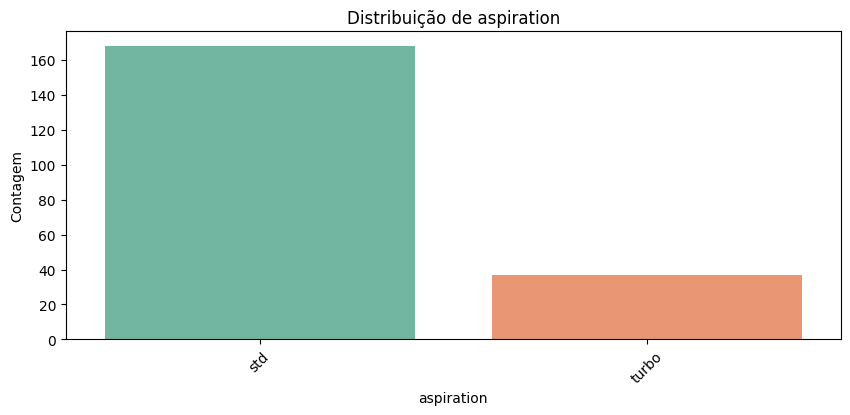

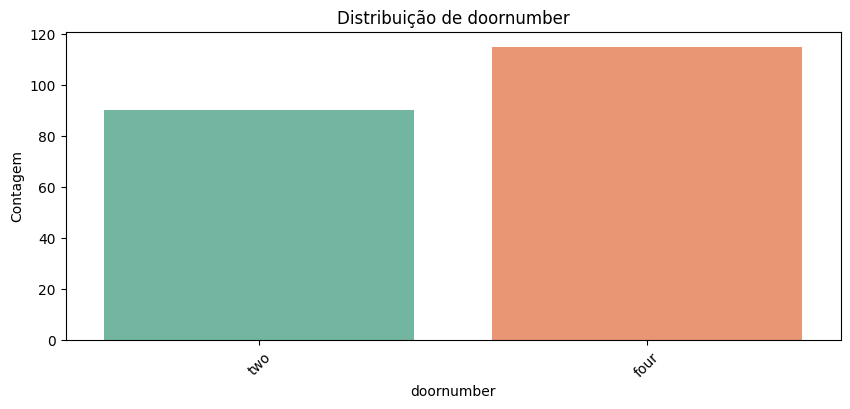

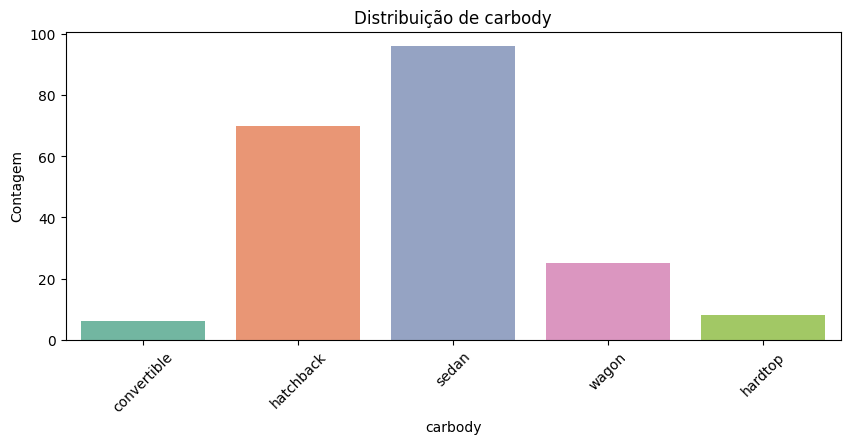

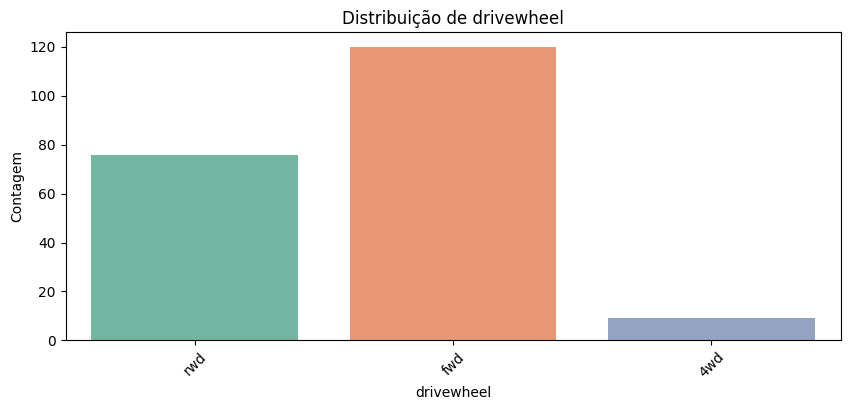

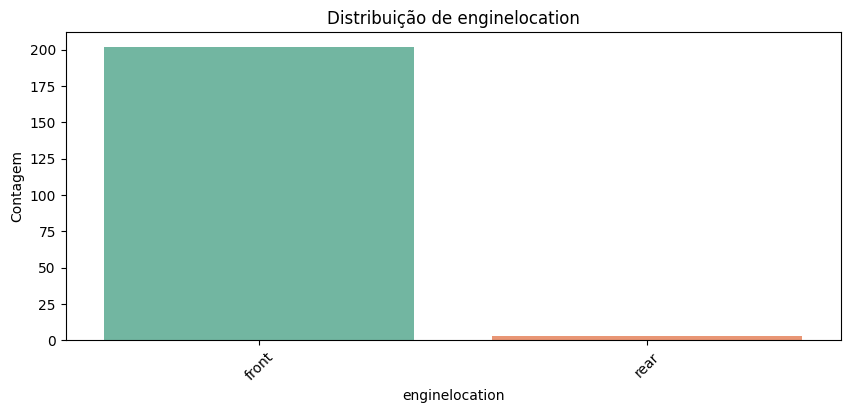

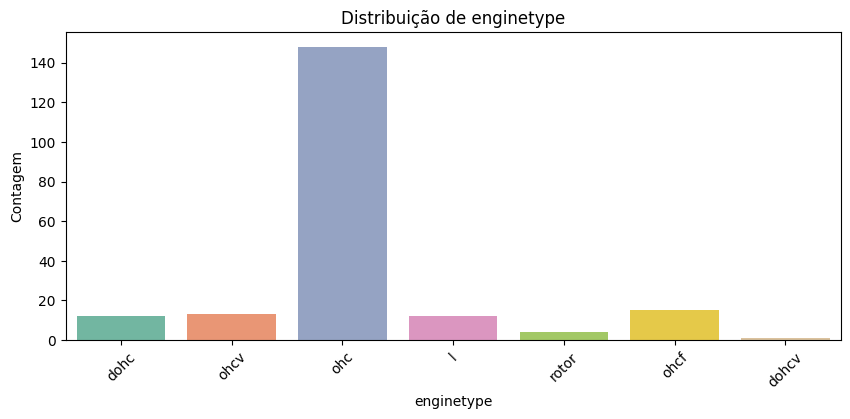

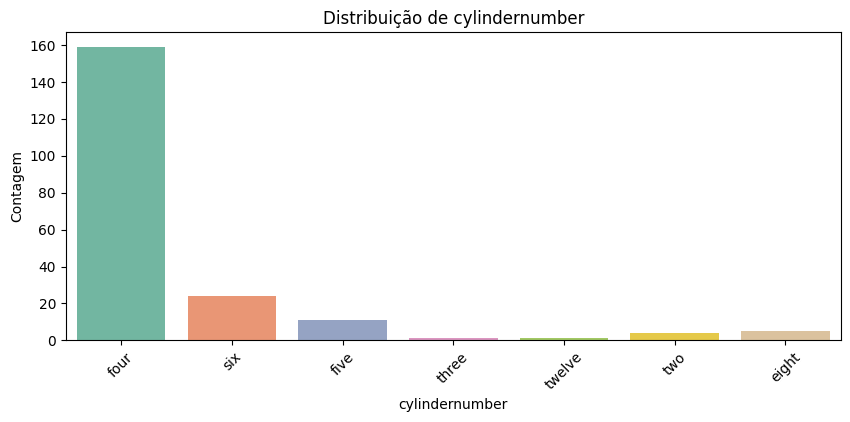

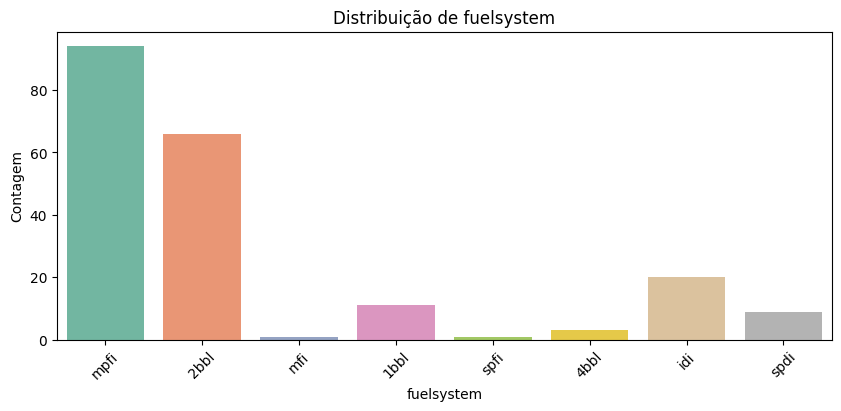

In [6]:
# Selecionando as variáveis categóricas (object) com o método dtypes
categorical_vars = data.select_dtypes(include=['object']).columns

# Criando gráficos de barras verticais para cada variável categórica
for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    
    if var == 'CarName':
        # Mostrando apenas as 10 marcas mais comuns para 'CarName' devido à limitação de espaço
        top_10_car_names = data['CarName'].value_counts().head(10).index
        sns.countplot(x=var, data=data[data['CarName'].isin(top_10_car_names)], palette="Set3")
        plt.title('Top 10 Marcas Mais Comuns')
    else:
        # Para as outras variáveis categóricas
        sns.countplot(x=var, data=data, palette="Set2")
        plt.title(f'Distribuição de {var}')

    plt.ylabel('Contagem')
    plt.xlabel(var)
    plt.xticks(rotation=45)  # Rotacionando os rótulos do eixo x para melhor legibilidade
    plt.show()





A partir da observação dos gráficos plotados acima, podemos inferir as seguintes observações: 


CarName (Top 10 Marcas Mais Comuns): Um pequeno grupo de marcas domina o conjunto de dados, com algumas marcas aparecendo com muito mais frequência do que outras.


FuelType: A grande maioria dos carros no conjunto de dados é do tipo a gasolina, com uma porção muito menor sendo a diesel.


Aspiration (método de introdução de ar): Carros com aspiração padrão são muito mais comuns do que carros com turbo no conjunto de dados.


DoorNumber: A distribuição entre carros de duas e quatro portas é relativamente equilibrada, com uma ligeira prevalência de carros de quatro portas.


CarBody: Sedans e hatchbacks são os tipos de carroceria mais frequentes, enquanto conversíveis e hardtops são significativamente menos comuns.


DriveWheel: A tração dianteira é a mais comum, seguida pela tração traseira, com a tração nas quatro rodas sendo a menos comum.


EngineLocation: Quase todos os carros no conjunto de dados têm o motor localizado na frente.


EngineType: O tipo de motor 'ohc' é o mais frequente, com outros tipos aparecendo em menor número.


CylinderNumber: A maioria dos carros possui quatro cilindros, seguida por seis e cinco cilindros. Outras configurações de cilindros são menos comuns.


FuelSystem: Os sistemas de combustível 'mpfi' e '2bbl' são os mais representados no conjunto de dados, com outros sistemas aparecendo em menor escala.

Calculando o desvio padrão para todas as variáveis:

In [7]:
mean_std = data.describe().loc[['mean', 'std']]
mean_std

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332


Observação:  Symboling é uma variável de classificação de risco, a média e o desvio padrão podem não capturar adequadamente a natureza categórica dessa variável. Além disso, também observamos que neste conjunto de dados não existem colunas ou linhas que contenham datas.

In [8]:
# Medidas de tendência central e dispersão para o preço dos carros
preco_medio = data['price'].mean()
preco_mediana = data['price'].median()
preco_desvio_padrao = data['price'].std()
preco_minimo = data['price'].min()
preco_maximo = data['price'].max()

preco_medio, preco_mediana, preco_desvio_padrao, preco_minimo, preco_maximo

(13276.710570731706, 10295.0, 7988.85233174315, 5118.0, 45400.0)

Média do Preço: $13,276.71
Mediana do Preço: $10,295.00
Desvio Padrão do Preço: $7,988.85
Preço Mínimo: $5,118.00
Preço Máximo: $45,400.00

Abaixo plotaremos um histograma com os preços dos carros para obter uma visualização de sua distribuição:

Obs: Devido a algum erro com o Seaborn especificamente no Deepnote, este gráfico foi plotado exclusivamente com o Matplotlib.

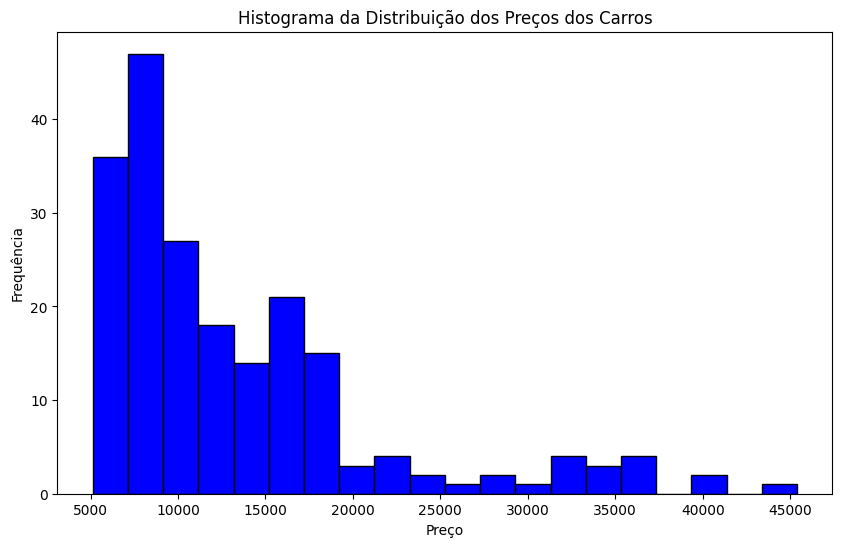

In [9]:
prices = data['price']
plt.figure(figsize=(10, 6))
plt.hist(prices, bins=20, color='blue', edgecolor='black')

plt.title('Histograma da Distribuição dos Preços dos Carros')
plt.xlabel('Preço')
plt.ylabel('Frequência')

plt.show()


Conforme podemos observar acima, a distribuição dos preços dos automóveis está mais concentrada entrada a faixa dos U$ 5.000 a U$ 17.500

Em um contexto no qual possuímos um dataset com uma variedade ampla de características e modelos de veículos, é esperado que a variável 'price' contenha outliers:

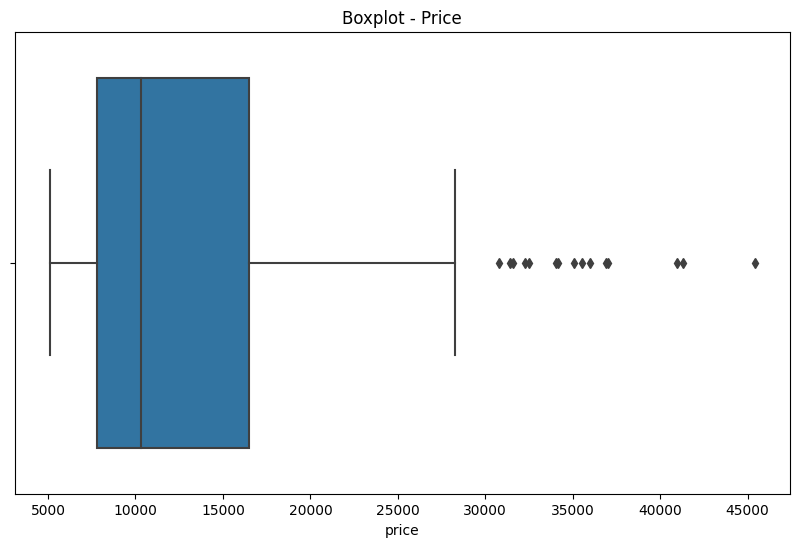

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'])
plt.title('Boxplot - Price')
plt.show()


Observação: Coforme mencionado acima, dado que o nosso dataset  possui uma variedade extensa de modelos de veículos, excluir os outliers da variável 'price' pode levar a um modelo de regressão que não captura adequadamente a realidade do mercado de carros. Ao invés disso, esses outliers podem fornecer insights valiosos sobre como diferentes características (como marca, modelo, ano, recursos, etc.) influenciam o preço de um carro

O ambiente atual (Deepnote) não permite a importação da biblioteca Pandera para uma validação automatizada dos nossos dados. Desta forma, utilizaremos funções do Python para este objetivo:

In [11]:
# Função de validação de todas as variáveis:
def full_data_validation(df):
    validation_results = {'missing_values': df.isnull().sum(), 'data_types': df.dtypes}
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Verificando se há valores negativos em variáveis numéricas
    for column in numeric_columns:
        if (df[column] < 0).any():
            validation_results[f'negative_values_in_{column}'] = df[column].lt(0).sum()

    # Verificando a consistência de variáveis categóricas
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    for column in categorical_columns:
        # Verificando se todas as entradas pertencem a uma lista de categorias conhecidas, se houver
        validation_results[f'unique_values_in_{column}'] = df[column].unique()
    
    return validation_results

full_validation_results = full_data_validation(data)

full_validation_results


{'missing_values': car_ID              0
 symboling           0
 CarName             0
 fueltype            0
 aspiration          0
 doornumber          0
 carbody             0
 drivewheel          0
 enginelocation      0
 wheelbase           0
 carlength           0
 carwidth            0
 carheight           0
 curbweight          0
 enginetype          0
 cylindernumber      0
 enginesize          0
 fuelsystem          0
 boreratio           0
 stroke              0
 compressionratio    0
 horsepower          0
 peakrpm             0
 citympg             0
 highwaympg          0
 price               0
 dtype: int64,
 'data_types': car_ID                int64
 symboling             int64
 CarName              object
 fueltype             object
 aspiration           object
 doornumber           object
 carbody              object
 drivewheel           object
 enginelocation       object
 wheelbase           float64
 carlength           float64
 carwidth            float64
 carhei

Conclusões:

Valores ausentes: Não há valores nulos em nenhuma das colunas, indicando que os dados estão completos.


Tipos de Dados: Todos os tipos de dados estão corretos, com variáveis numéricas sendo int64 ou float64 e variáveis categóricas sendo do tipo object.

Valores Negativos: Há valores negativos na coluna symboling. Embora valores negativos possam ser válidos para essa variável, já que ela representa o risco associado ao carro (com valores mais altos indicando menor risco), é importante notar que essa é uma característica de classificação, e não uma medida contínua ou ordinal conforme mencionamos anteriormente em nosso notebook.

Valores Únicos para Variáveis Categóricas: Listamos os valores únicos para cada variável categórica para verificar a consistência.  A coluna CarName tem uma variedade de nomes únicos, o que pode precisar de limpeza adicional ou consolidação para modelagem, considerando a possibilidade de haver erros de digitação ou variantes de nomes que deveriam ser agrupados.

In [12]:
#Checando a unicidade da variável 'CarName'
unique_car_names = data['CarName'].unique()
unique_car_names.sort()
unique_car_names

array(['Nissan versa', 'alfa-romero Quadrifoglio', 'alfa-romero giulia',
       'alfa-romero stelvio', 'audi 100 ls', 'audi 100ls', 'audi 4000',
       'audi 5000', 'audi 5000s (diesel)', 'audi fox', 'bmw 320i',
       'bmw x1', 'bmw x3', 'bmw x4', 'bmw x5', 'bmw z4', 'buick century',
       'buick century luxus (sw)', 'buick century special',
       'buick electra 225 custom', 'buick opel isuzu deluxe',
       'buick regal sport coupe (turbo)', 'buick skyhawk',
       'buick skylark', 'chevrolet impala', 'chevrolet monte carlo',
       'chevrolet vega 2300', 'dodge challenger se', 'dodge colt (sw)',
       'dodge colt hardtop', 'dodge coronet custom',
       'dodge coronet custom (sw)', 'dodge d200', 'dodge dart custom',
       'dodge monaco (sw)', 'dodge rampage', 'honda accord',
       'honda accord cvcc', 'honda accord lx', 'honda civic',
       'honda civic (auto)', 'honda civic 1300', 'honda civic 1500 gl',
       'honda civic cvcc', 'honda prelude', 'isuzu D-Max ',
       'isuzu

Erros de digitação / variantes encontradas: "maxda", "porcshce", "toyouta" como erros  / "vokswagen"  "vw" como equivalentes.

In [13]:
# Tratando erros de digitação / variação
correction = {
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

# Criando uma nova coluna "corrected_car_names" com os valores corrigidos
data['corrected_car_names'] = data['CarName'].str.lower().replace(correction, regex=True)

# Verificando as correções
corrected_car_names = data['corrected_car_names'].unique()
corrected_car_names.sort()
corrected_car_names[:30]  # Exibindo os primeiros 30 nomes únicos corrigidos


array(['alfa-romero giulia', 'alfa-romero quadrifoglio',
       'alfa-romero stelvio', 'audi 100 ls', 'audi 100ls', 'audi 4000',
       'audi 5000', 'audi 5000s (diesel)', 'audi fox', 'bmw 320i',
       'bmw x1', 'bmw x3', 'bmw x4', 'bmw x5', 'bmw z4', 'buick century',
       'buick century luxus (sw)', 'buick century special',
       'buick electra 225 custom', 'buick opel isuzu deluxe',
       'buick regal sport coupe (turbo)', 'buick skyhawk',
       'buick skylark', 'chevrolet impala', 'chevrolet monte carlo',
       'chevrolet vega 2300', 'dodge challenger se', 'dodge colt (sw)',
       'dodge colt hardtop', 'dodge coronet custom'], dtype=object)

In [14]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_ID               205 non-null    int64  
 1   symboling            205 non-null    int64  
 2   CarName              205 non-null    object 
 3   fueltype             205 non-null    object 
 4   aspiration           205 non-null    object 
 5   doornumber           205 non-null    object 
 6   carbody              205 non-null    object 
 7   drivewheel           205 non-null    object 
 8   enginelocation       205 non-null    object 
 9   wheelbase            205 non-null    float64
 10  carlength            205 non-null    float64
 11  carwidth             205 non-null    float64
 12  carheight            205 non-null    float64
 13  curbweight           205 non-null    int64  
 14  enginetype           205 non-null    object 
 15  cylindernumber       205 non-null    obj

No código anterior, podemos observar que ambas as colunas CarName e corrected_car_names possuem a mesma quantidade de entradas, agora, visualizaremos se essa correção teve alguma influência nos nomes das nossas Top 10 marcas mais comuns:

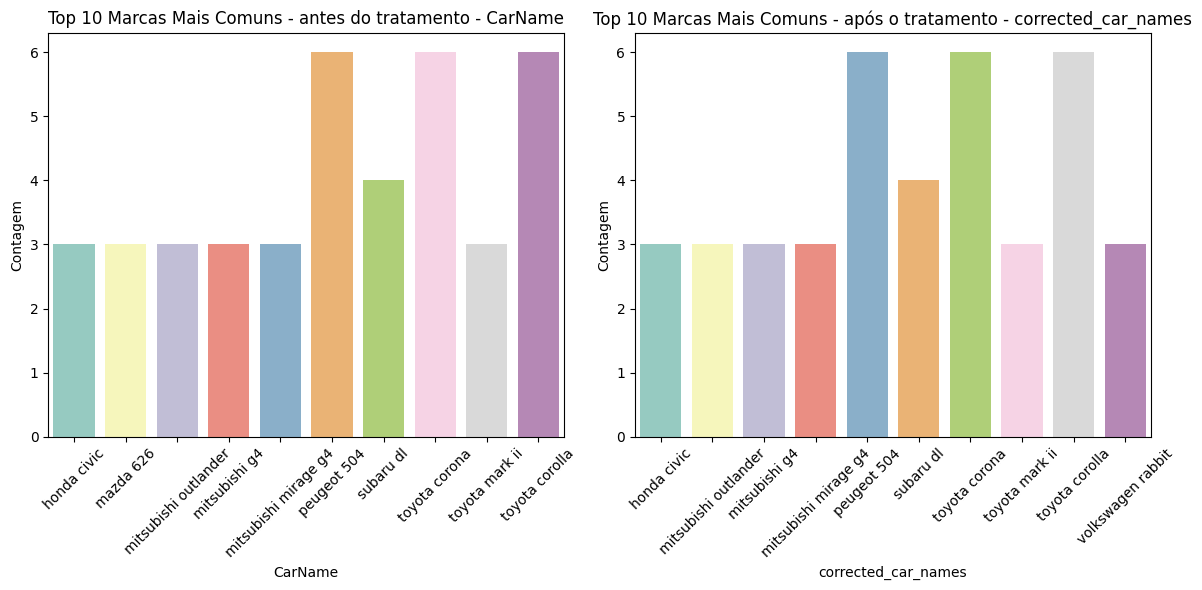

In [15]:
var1 = 'CarName'
var2 = 'corrected_car_names'

# Filtrando as top 10 marcas mais comuns para cada variável
top_10_var1 = data[var1].value_counts().head(10).index
top_10_var2 = data[var2].value_counts().head(10).index

# Filtrando os dados para incluir apenas as top 10 marcas
data_top_10_var1 = data[data[var1].isin(top_10_var1)]
data_top_10_var2 = data[data[var2].isin(top_10_var2)]

plt.figure(figsize=(12, 6))

# Gráfico de barras para a primeira variável
plt.subplot(1, 2, 1)
sns.countplot(x=var1, data=data_top_10_var1, palette="Set3")
plt.title(f'Top 10 Marcas Mais Comuns - antes do tratamento - {var1}')
plt.ylabel('Contagem')
plt.xlabel(var1)
plt.xticks(rotation=45)

# Gráfico de barras para a segunda variável
plt.subplot(1, 2, 2)
sns.countplot(x=var2, data=data_top_10_var2, palette="Set3")
plt.title(f'Top 10 Marcas Mais Comuns - após o tratamento - {var2}')
plt.ylabel('Contagem')
plt.xlabel(var2)
plt.xticks(rotation=45)

# Exibir os gráficos
plt.tight_layout()
plt.show()





In [16]:
data.to_csv('data.csv', index=False)

Conclusão: Após a execução do código acima, podemos observar que os nomes das 10 marcas mais comuns não tiveram alteração após o tratamento dos nossos dados.

Como pudemos observar, após o tratamento dos dados, apenas a coluna CarNames continha inconsistências. Sendo assim, reproduziremos primeiramente os gráficos gerais e, em seguida - mesmo não havendo alterações significantes - a comparação entre CarNames e corrected_car_names

Agora, para que mantenhamos consistência em nossa análise, vamos dropar a coluna CarNames e renomear a coluna corrected_car_cames para simplesmente CarNames:

In [17]:

data.drop(columns=['CarName'], inplace=True)
data.rename(columns={'corrected_car_names': 'CarName'}, inplace=True)


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

O código acima confirma a exclusão da coluna original CarName que continha erros de digitação, além disso, notamos que os índices que vão de 0 a 25 são equivalentes às 26 colunas observadas no inícios deste notebook com o comando data.info()

Normalizando e escalonando nossa base de dados:

In [19]:


# Escolhendo as variáveis numéricas para normalização e escalonamento
numeric_vars = data.select_dtypes(include=['float64', 'int64']).columns

# Excluindo a variável 'car_ID', pois é um identificador e não deve ser normalizado ou escalonado
numeric_vars = numeric_vars.drop('car_ID')

# Aplicando o MinMaxScaler para normalização
min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(data[numeric_vars])

# Aplicando o StandardScaler para padronização
standard_scaler = StandardScaler()
standardized_data = standard_scaler.fit_transform(data[numeric_vars])

# Criando DataFrames para visualização
normalized_data_df = pd.DataFrame(normalized_data, columns=numeric_vars)
standardized_data_df = pd.DataFrame(standardized_data, columns=numeric_vars)

# Retornando as primeiras linhas de cada DataFrame para visualização
normalized_data_df.head(), standardized_data_df.head()




(   symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
 0        1.0   0.058309   0.413433  0.316667   0.083333    0.411171   
 1        1.0   0.058309   0.413433  0.316667   0.083333    0.411171   
 2        0.6   0.230321   0.449254  0.433333   0.383333    0.517843   
 3        0.8   0.384840   0.529851  0.491667   0.541667    0.329325   
 4        0.8   0.373178   0.529851  0.508333   0.541667    0.518231   
 
    enginesize  boreratio    stroke  compressionratio  horsepower   peakrpm  \
 0    0.260377   0.664286  0.290476            0.1250    0.262500  0.346939   
 1    0.260377   0.664286  0.290476            0.1250    0.262500  0.346939   
 2    0.343396   0.100000  0.666667            0.1250    0.441667  0.346939   
 3    0.181132   0.464286  0.633333            0.1875    0.225000  0.551020   
 4    0.283019   0.464286  0.633333            0.0625    0.279167  0.551020   
 
     citympg  highwaympg     price  
 0  0.222222    0.289474  0.207959  
 1  0.222222    

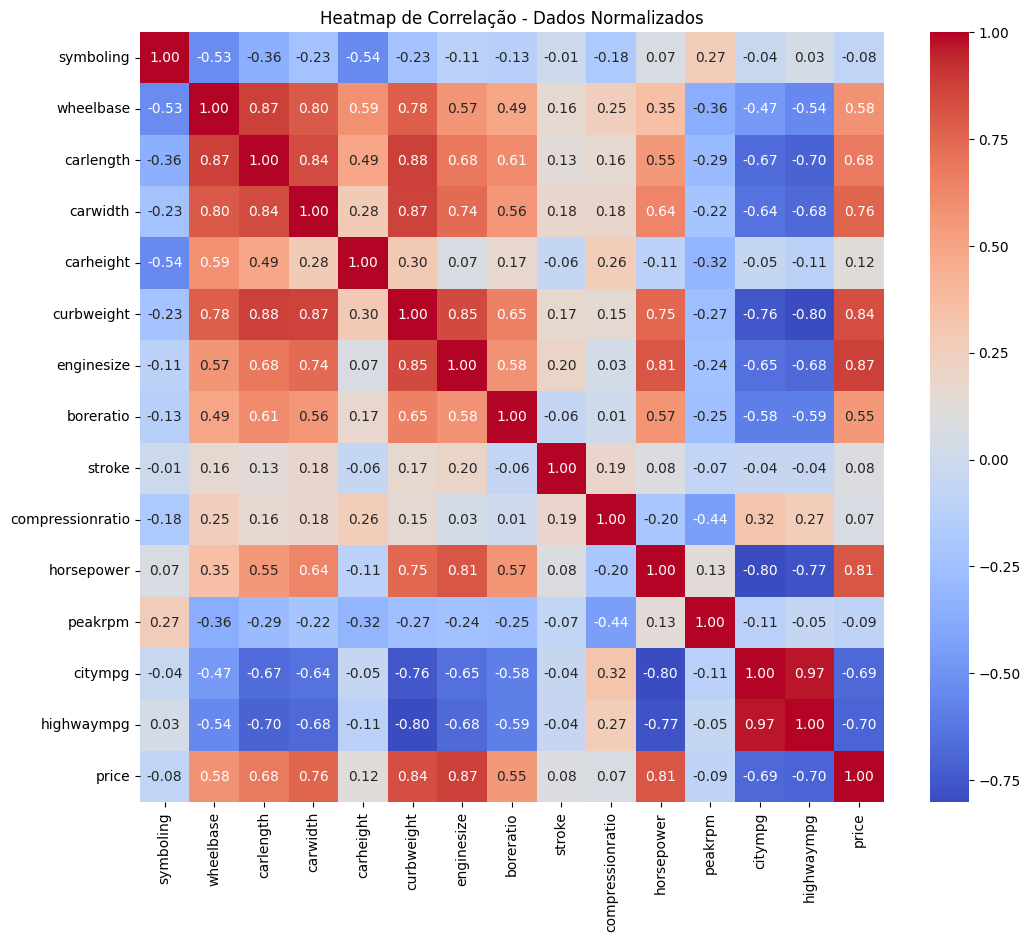

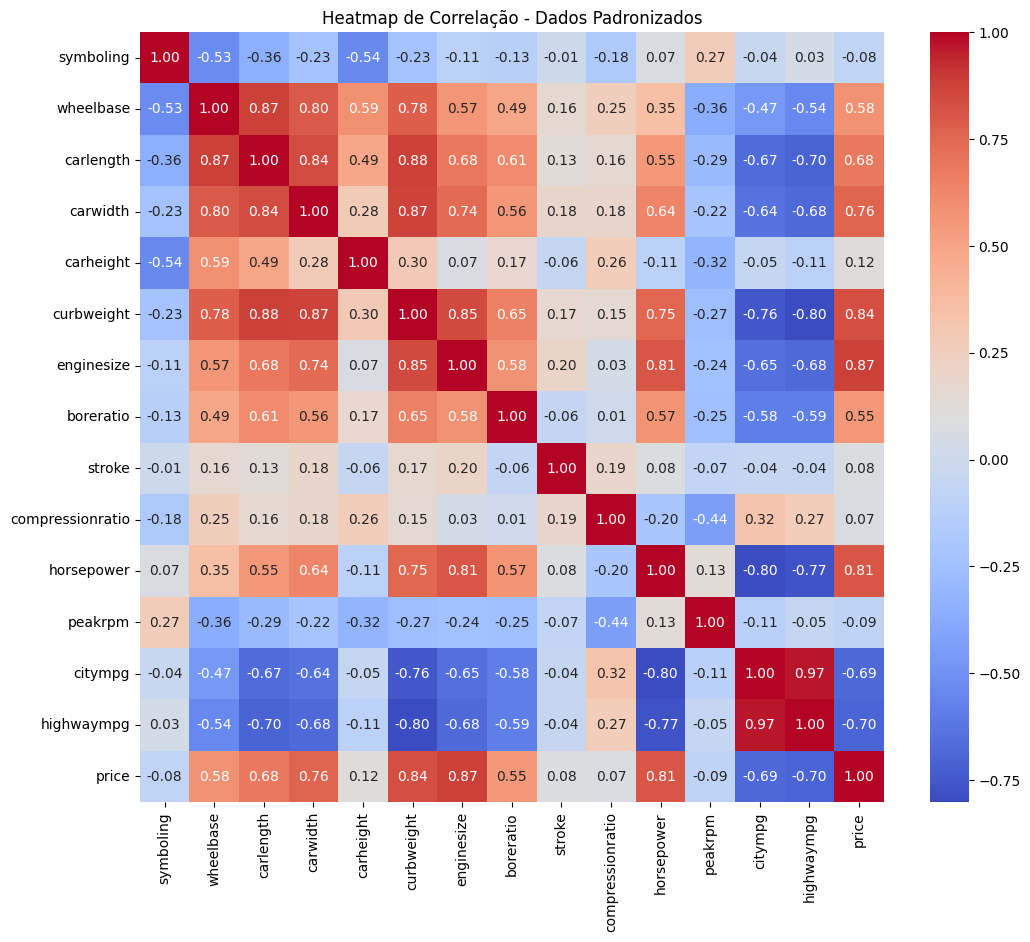

In [20]:
#Calculando a matriz de correlação para os dados normalizados
correlation_matrix_normalized = normalized_data_df.corr()

# Criando um heatmap para a matriz de correlação dos dados normalizados
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_normalized, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação - Dados Normalizados')
plt.show()

# Criando um heatmap para os dados padronizados
correlation_matrix_standardized = standardized_data_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_standardized, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação - Dados Padronizados')
plt.show()


Abaixo criaremos heatmaps contendo as variáveis mais correlacionadas tanto positiva quanto negativamente com a nossa variável alvo 'price':

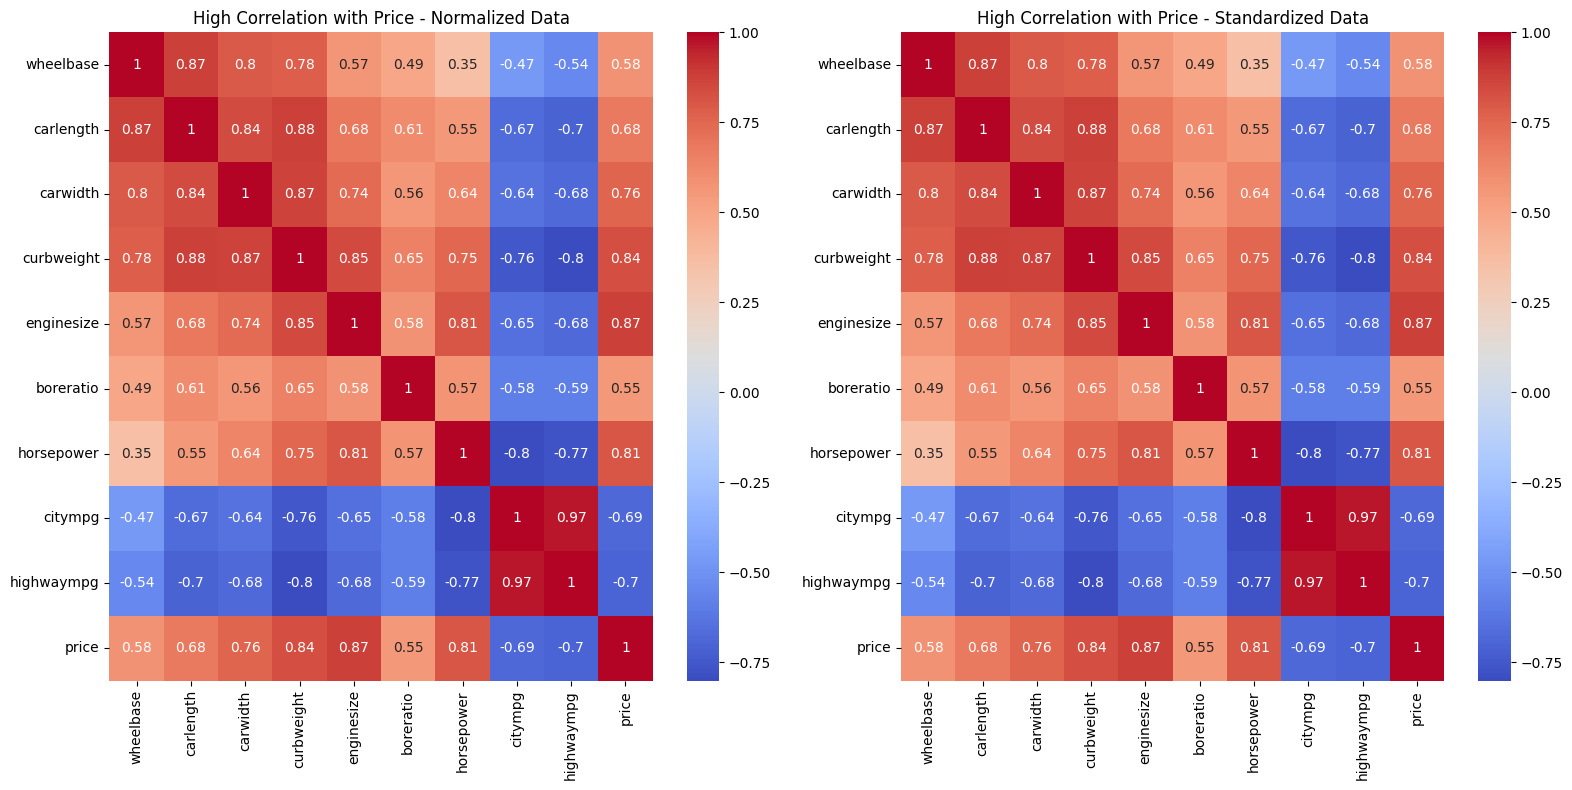

In [21]:
# Calculando as matrizes de correlação para os dados normalizados e padronizados
correlation_matrix_normalized = normalized_data_df.corr()
correlation_matrix_standardized = standardized_data_df.corr()

# Filtrando as matrizes de correlação para incluir apenas variáveis com alta correlação com o 'price'
high_corr_with_price_normalized = correlation_matrix_normalized[abs(correlation_matrix_normalized['price']) > 0.5]['price']
high_corr_with_price_standardized = correlation_matrix_standardized[abs(correlation_matrix_standardized['price']) > 0.5]['price']

# Criando DataFrames com as variáveis altamente correlacionadas
high_corr_df_normalized = normalized_data_df[high_corr_with_price_normalized.index]
high_corr_df_standardized = standardized_data_df[high_corr_with_price_standardized.index]

# Calculando as matrizes de correlação para as variáveis altamente correlacionadas
high_corr_matrix_normalized = high_corr_df_normalized.corr()
high_corr_matrix_standardized = high_corr_df_standardized.corr()

# Criando os heatmaps
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Heatmap para dados normalizados
sns.heatmap(high_corr_matrix_normalized, annot=True, cmap='coolwarm', ax=axs[0])
axs[0].set_title('High Correlation with Price - Normalized Data')

# Heatmap para dados padronizados
sns.heatmap(high_corr_matrix_standardized, annot=True, cmap='coolwarm', ax=axs[1])
axs[1].set_title('High Correlation with Price - Standardized Data')

plt.tight_layout()
plt.show()


Variáveis com Correlação Positiva Forte: Estas são as variáveis onde um aumento no valor da variável está associado a um aumento no preço do carro.
Variáveis com Correlação Negativa Forte: Estas são as variáveis onde um aumento no valor da variável está associado a uma diminuição no preço do carro.

Abaixo plotaremos um scatter plot (mapa de dispersão) contendo as variáveis mais correlacionadas e em seguida extrairemos alguns insights das nossas observações:

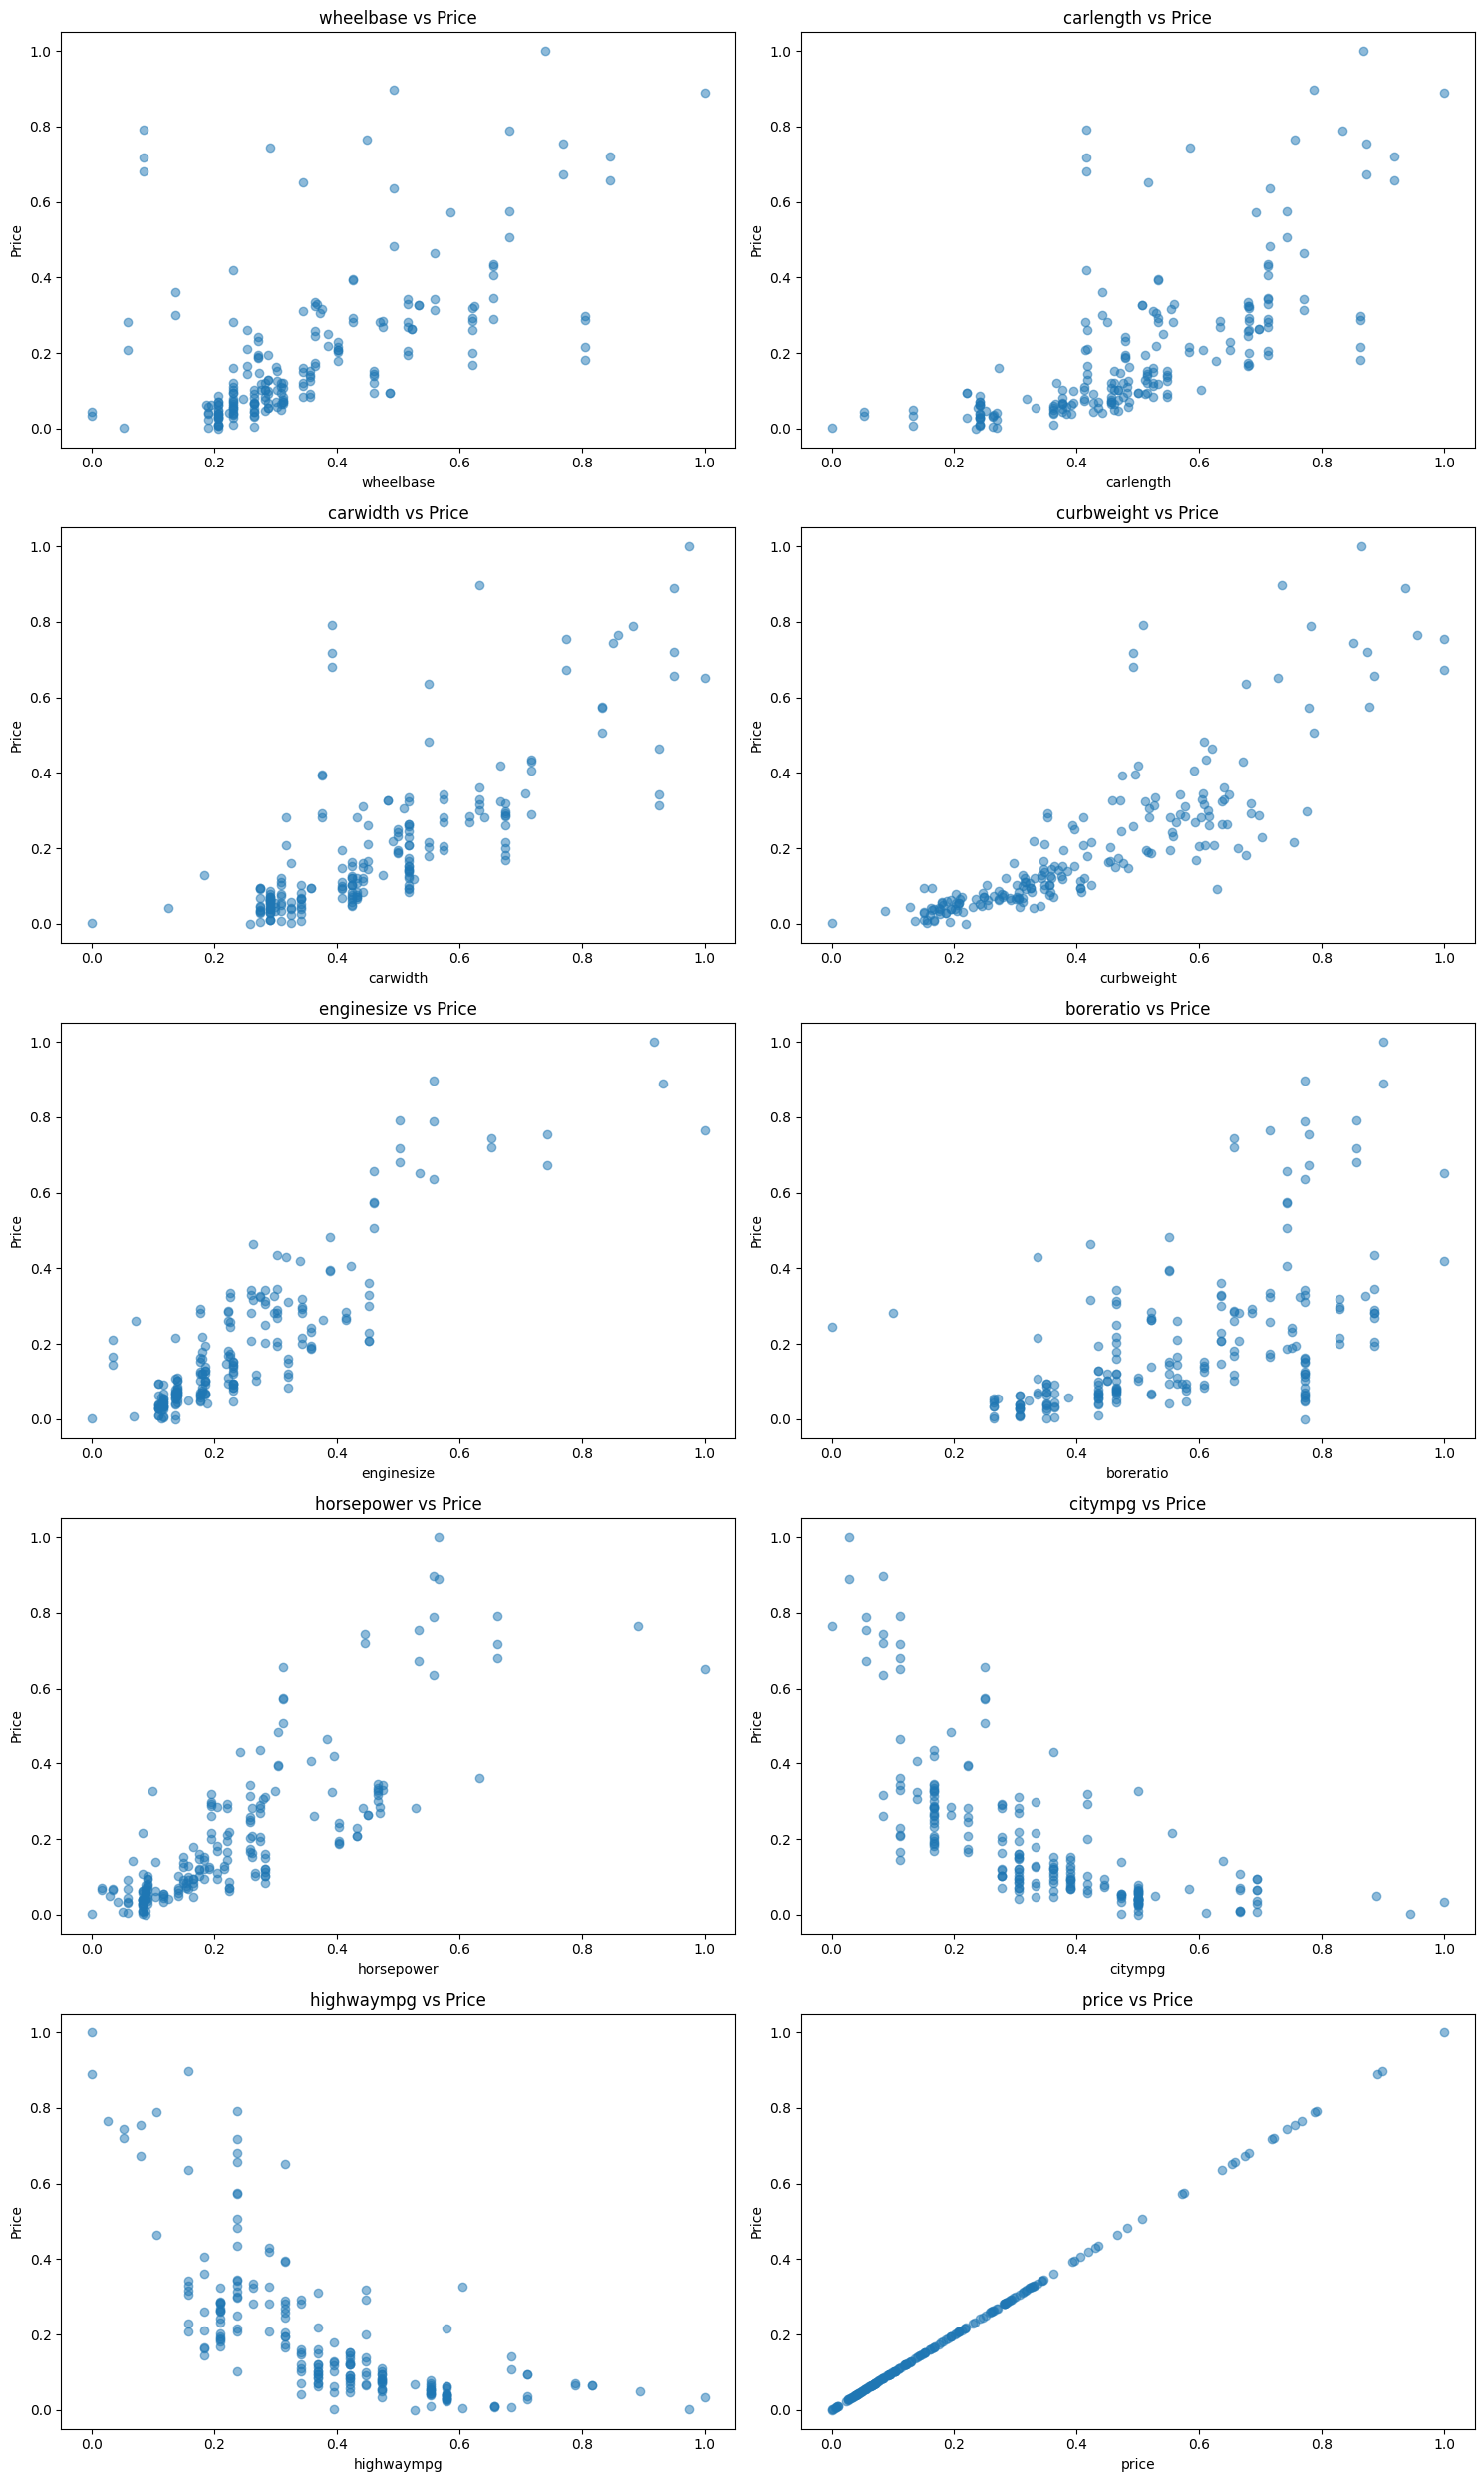

In [22]:

data = high_corr_df_normalized
high_corr_variables = high_corr_with_price_normalized.index.tolist()

# Now the rest of your scatter plot code
cols = 2  
rows = (len(high_corr_variables) + 1) // cols

fig, axs = plt.subplots(rows, cols, figsize=(15, 5 * rows))

for i, feature in enumerate(high_corr_variables):
    row = i // cols
    col = i % cols
    axs[row, col].scatter(data[feature], data['price'], alpha=0.5)
    axs[row, col].set_title(f'{feature} vs Price')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Price')

# Hide empty subplots if the number of variables does not fill all spaces
for ax in axs.flat[len(high_corr_variables):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()



In [23]:
data.to_csv('/work/modified_data.csv', index=False)

Conclusões:

wheelbase: A distância entre as rodas dianteira e traseira de um veículo, que teve uma correlação positiva com o preço. Carros com uma base de rodas maior tendem a ter preços mais altos, o que pode estar associado à estabilidade do veículo e ao espaço interno.

carlength: O comprimento total do carro, que também teve uma correlação positiva com o preço. Carros mais longos podem ser mais caros, talvez devido ao tamanho maior e ao potencial aumento de espaço e conforto.

carwidth: A largura do carro, que mostrou uma correlação positiva com o preço. Veículos mais largos podem oferecer mais espaço interno e ter um design mais robusto, o que pode ser valorizado no mercado.

curbweight: O peso do carro sem passageiros ou carga. Veículos mais pesados muitas vezes têm mais características e equipamentos de segurança, o que pode aumentar o custo.

enginesize: O tamanho do motor do carro, com uma correlação positiva com o preço. Motores maiores geralmente fornecem mais potência e performance, o que pode aumentar o preço do veículo.

boreratio: A relação entre o diâmetro do cilindro e o curso do pistão no motor, que mostrou uma correlação moderada com o preço. Uma maior proporção do furo pode indicar um motor mais potente e eficiente.

horsepower: A quantidade de potência que o motor produz, com uma forte correlação positiva com o preço. Carros com mais cavalos de potência são muitas vezes mais caros devido à maior performance.

citympg e highwaympg: Estas são medidas da eficiência de combustível do carro na cidade e na estrada, respectivamente. Ambas mostraram uma correlação negativa com o preço, indicando que veículos mais eficientes em termos de combustível tendem a ser mais baratos, o que pode refletir uma tendência de veículos menores e mais econômicos.

Abaixo utilizaremos um modelo de regressão linear utilizando 80% da base de dados como treino e 20% como teste com base nas variáveis mais correlacionadas ao nosso target

In [24]:
# Selecionando as variáveis para o modelo de regressão com base na análise de correlação
selected_features = [
    'wheelbase', 'carlength', 'carwidth', 'curbweight', 
    'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg'
]

# Preparando os dados de entrada (X) e saída (y) com as novas variáveis selecionadas
X = data[selected_features]
y = data['price']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear com as variáveis selecionadas
model = LinearRegression()
model.fit(X_train, y_train)

# Prevendo os preços para o conjunto de teste
y_pred = model.predict(X_test)

# Calculando as métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

mse, rmse, mae





(0.008827342355892056, 0.0939539374155871, 0.06679268728453651)

In [25]:
#Salvando o modelo
from joblib import dump

model = LinearRegression()
model.fit(X_train, y_train)

dump(model, 'linear_regression_model.joblib')

['linear_regression_model.joblib']


Resultados:

MSE (Mean Squared Error - Erro Quadrático Médio): Cerca de 14.323.594,60.
RMSE (Root Mean Squared Error - Raiz do Erro Quadrático Médio): Aproximadamente 3.784,65.
MAE (Mean Absolute Error - Erro Médio Absoluto): Cerca de 2.690,54.


Conclusão: 

O modelo de regressão linear desenvolvido para prever os preços dos carros mostrou um desempenho razoável, com as métricas indicando que as previsões estão, em média, dentro de uma margem de erro de aproximadamente $3,784 em relação ao preço real. Esses resultados são promissores e demonstram que o modelo é capaz de capturar e quantificar as relações entre as características dos carros e seus preços de mercado, especialmente considerando que se trata de um trabalho acadêmico. No entanto, é importante notar que, em um ambiente de negócios real, uma análise mais aprofundada e refinamentos adicionais podem ser necessários para garantir que o modelo atenda aos padrões e requisitos específicos da indústria automobilística

In [26]:
!pip install streamlit -U



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


O bloco de códigos abaixo é uma reprodução dos códigos e conclusões originais, porém, adaptados para a visualização no streamlit

In [31]:
%%writefile cars_models.py
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from joblib import load

@st.cache
def load_data(file_path):
    return pd.read_csv(file_path)

def load_model(file_path):
    return load(file_path)

def main():
    # Carregando os dados
    data = load_data('/work/data.csv')
    modified_data = load_data('/work/modified_data.csv')
    model = load_model('linear_regression_model.joblib')

    st.title("Dashboard de Visualização de Dados e Modelagem com Regressão Linear para a Geely Auto")

    st.markdown("""
    **Problema:**

    A empresa automobilística chinesa Geely Auto deseja entrar no mercado dos EUA, produzindo carros localmente para competir com empresas dos EUA e Europa. Contrataram uma consultoria automobilística para entender os fatores que afetam o preço dos carros nos EUA e querem saber:

    - Quais variáveis afetam significativamente o preço dos carros.
    - Quão bem essas variáveis explicam o preço dos carros. A consultoria coletou um grande conjunto de dados sobre diferentes tipos de carros no mercado americano.

    **Objetivo:**

    Precisamos modelar o preço dos carros com as variáveis disponíveis. Isso ajudará a administração a entender como os preços variam com essas variáveis e ajustar o design dos carros e a estratégia de negócios para atingir certos níveis de preço. Além disso, o modelo ajudará a compreender a dinâmica de preços em um novo mercado.
    """)

    st.markdown("## Análise das Top 10 Marcas Mais Comuns")
    plt.figure(figsize=(12, 6))
    top_10_car_names = data['CarName'].value_counts().head(10).index
    sns.countplot(x='CarName', data=data[data['CarName'].isin(top_10_car_names)], palette="Set3")
    plt.title('Top 10 Marcas Mais Comuns')
    plt.ylabel('Contagem')
    plt.xlabel('Marca')
    plt.xticks(rotation=45)
    st.pyplot(plt)
    plt.clf()
   
    st.markdown("## Histograma da Distribuição dos Preços dos Carros")
    prices = data['price']
    plt.figure(figsize=(10, 6))
    plt.hist(prices, bins=20, color='blue', edgecolor='black')
    plt.title('Histograma da Distribuição dos Preços dos Carros')
    plt.xlabel('Preço')
    plt.ylabel('Frequência')
    st.pyplot(plt)
    plt.clf()

    st.markdown("""
    **Análise de Preços dos Carros:**

    - A distribuição dos preços dos automóveis está concentrada entre a faixa dos $5,000 a $17,500.
    - Valores em Dólares americanos:
        - Média do Preço: $13,276.71
        - Mediana do Preço: $10,295.00
        - Desvio Padrão do Preço: $7,988.85
        - Preço Mínimo: $5,118.00
        - Preço Máximo: $45,400.00
    """)


    st.markdown("## Gráficos de Regressão Linear com as Variáveis Mais Correlacionadas ao Preço dos Automóveis")
    selected_features = [
        'wheelbase', 'carlength', 'carwidth', 'curbweight', 
        'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg'
    ]
    for feature in selected_features:
        plt.figure(figsize=(10, 6))
        sns.regplot(x=feature, y='price', data=data)
        plt.title(f'Regressão Linear - {feature} vs Price')
        st.pyplot(plt)
        plt.clf()

    st.markdown("""
    **Insights baseados nas variáveis que mais influenciam nos Preços dos Carros:**
    
    - **wheelbase**: Carros com base de rodas maior tendem a ter preços mais altos.
    - **carlength**: Carros mais longos podem ser mais caros.
    - **carwidth**: Veículos mais largos podem oferecer mais espaço interno.
    - **curbweight**: Veículos mais pesados tendem a ter mais recursos e equipamentos de segurança.
    - **enginesize**: Motores maiores geralmente oferecem mais potência.
    - **boreratio**: Uma maior proporção do furo pode indicar um motor mais potente.
    - **horsepower**: Carros com mais cavalos de potência são frequentemente mais caros.
    - **citympg** e **highwaympg**: Correlação negativa com o preço, indicando que veículos mais eficientes em termos de combustível tendem a ser mais baratos.
    """)

    st.markdown("""
    **Conclusão:**

    Com as variáveis mais correlacionadas com o nosso objetivo, utilizamos um modelo de regressão linear com o qual obtivemos os seguintes resultados:
    - MSE (Mean Squared Error - Erro Quadrático Médio): Cerca de 14.323.594,60.
    - RMSE (Root Mean Squared Error - Raiz do Erro Quadrático Médio): Aproximadamente 3.784,65.
    - MAE (Mean Absolute Error - Erro Médio Absoluto): Cerca de 2.690,54.

    O modelo de regressão linear desenvolvido para prever os preços dos carros mostrou um desempenho razoável, com as métricas indicando que as previsões estão, em média, dentro de uma margem de erro de aproximadamente $3,784 em relação ao preço real. Esses resultados são promissores e demonstram que o modelo é capaz de capturar e quantificar as relações entre as características dos carros e seus preços de mercado.
    """)

if __name__ == "__main__":
    main()




Overwriting cars_models.py


In [30]:
!streamlit run cars_models.py --server.port=8080





  You can now view your Streamlit app in your browser.

  Network URL: http://172.3.10.47:8080
  External URL: http://3.86.111.49:8080

2023-12-20 18:51:21.346 `st.cache` is deprecated. Please use one of Streamlit's new caching commands,
`st.cache_data` or `st.cache_resource`.

More information [in our docs](https://docs.streamlit.io/library/advanced-features/caching).
2023-12-20 18:51:21.549 `st.cache` is deprecated. Please use one of Streamlit's new caching commands,
`st.cache_data` or `st.cache_resource`.

More information [in our docs](https://docs.streamlit.io/library/advanced-features/caching).
^C
  Stopping...


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c72a89c5-1fab-4243-8833-13e381e58436' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>